In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# Battle Ship

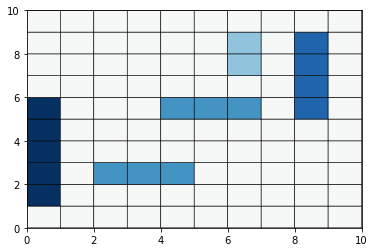

In [2]:
class random_ship_spot:
    """Gives the board with boats randomly"""
    
    def __init__(self,board_size, name):
        self.ships = np.array([['carrier',5],['battleship',4],['cruiser',3 ],['submarine',3] ,['destroyer',2] ] )
        self.board_size = int(board_size)
        self.player = str(name)
        self.board = self.arrangement()
        
    def yxo(self): 
        """Gives positions and orientation"""
        x,y,o = np.random.randint(1,self.board_size, size=3)
        return x,y,o%2
    
    def validation(self, i, board):
        """creat one ship without overlaps"""
        size = self.ships[:,1]
        validate = True
        while validate:
            x,y,o = self.yxo()
            if o == 1 and x+int(size[i]) <= self.board_size and board[x+int(size[i]),y]==0:
                if (all(board[x:x+int(size[i]),y]==0) and all(board[x:x+int(size[i]),y-1]==0) 
                    and all(board[x:x+int(size[i]),y+1]==0) and board[x-1,y] ==0 ):   
                    board[x:x+int(size[i])   ,   y] = int(size[i])
                    validate = False
                else: validate = True
            
            if o == 0  and y+int(size[i]) <= self.board_size and board[x, y+int(size[i])]==0:
                if  (all(board[x, y:y+int(size[i])]==0) and all(board[x-1, y:y+int(size[i])]==0) 
                     and all(board[x+1, y:y+int(size[i])]==0) and board[x, y-1]==0):
                    board[x, y:y+int(size[i])] = int(size[i])
                    validate = False
                else: validate = True
        return
        
    def arrangement(self):
        """creat the board with the validations rule"""
        board_ship = np.zeros((self.board_size+2,self.board_size+2))
        for i in range(5):
            ship, size = self.ships[i,0],int(self.ships[i,1])
            self.validation(i,board_ship)
        
        board_ship=board_ship[1:self.board_size+1,1:self.board_size+1]
        return board_ship
    
    def view(self):
        """if you desire to see the board """
        M = self.board
        plt.pcolor(M ,edgecolors='k', cmap='RdBu', vmin=-5,vmax=5, linewidths=0.6)
        plt.show()
        return
        
M = random_ship_spot(10, 'David').view()

In [3]:
class player():
    """This class gives the information about the player's board-ships, 
       
       the board's targeted control and plot both
    """
    def __init__(self, name, board_size):
        self.player      = name
        self.board_size  = board_size
        
        self.my_board    = random_ship_spot(board_size, name).board
        self.enemy_board = np.zeros((board_size,board_size))
        
    def board_ship(self):
        return self.my_board
    
    def board_shot(self):
        return self.enemy_board
    
    def plot(self , board_ship , board_shot , player_ship , player_shot, style1=0,style2=1 ):
        """Here you going to gettin with the p(n).board_ship(), p(n).board_shot(), 
           
           with the p(n).player and with p(m).player. Where n means the player attack and m the enemy
        """
        if style1 > 5: style1 = 0
        if style2 > 5: style1 = 1
        styles = ["RdBu","PRGn",'PiYG', 'BrBG', 'PuOr', 'RdGy']
        f = plt.figure(figsize=(10,4))
        ax1,ax2 = f.add_subplot(121),f.add_subplot(122)
        ax1.pcolor(board_ship ,edgecolors='k', cmap=styles[style1], vmin=-5,vmax=5, linewidths=0.6)
        ax2.pcolor(board_shot ,edgecolors='k', cmap=styles[style2], vmin=-5,vmax=5, linewidths=0.6)
        ax1.set_xlabel('X'),ax1.set_ylabel('Y')
        ax2.set_xlabel('X'),ax2.set_ylabel('Y')
        ax1.set_title(player_ship+"'s Board of Ship")
        ax2.set_title(player_shot+"'s Board shotted by me")
        plt.show()
        return
        
    def __str__(self):
        return 'Player: {}; Size of the board: {} by {}'.format(self.player
                ,len(self.my_board),len(self.my_board))
player('Filipe', 10).board_ship()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 4., 4., 4., 4., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 3., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 3., 0.],
       [0., 5., 5., 5., 5., 5., 0., 0., 3., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 2., 2., 0., 0., 0.],
       [3., 3., 3., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

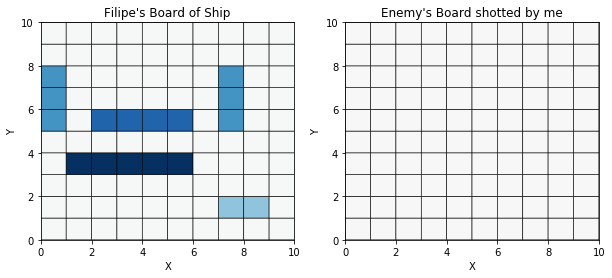

In [4]:
T = player('Filipe', 10)
T.plot( T.my_board , T.enemy_board , T.player , 'Enemy' )

# With memory

In [118]:
class AI:
    """That class gives three way that the computer could play"""
    def __init__(self,board_size, board_shot):
        self.bs = board_size
        self.board_shot = board_shot
    
    def xy(self):
        """Gives random positions to shot being able to shot the same place"""
        x,y = np.random.randint(0,self.bs, size=2)
        return x,y
    
    def xy_no_repetition(self):
        """Gives random positions but never repeat a shot"""
        ships_enemy = self.board_shot
        validate = True
        while validate:
            x,y = np.random.randint(0,self.bs, size=2)
            if ships_enemy[x,y] >= 0:
                validate = False
            else:
                validate = True
        return x,y
    
    def xy_memory(self):
        """Try to shoot beside a right shooted"""
        board_shot = self.board_shot
        for i in range(self.bs):
            for j in range(self.bs):
                if board_shot[i,j] == -10.:
                    
                    if i == 0 and j == 0:
                        if board_shot[i,j+1] == 0:
                            return i , j+1 
                        if board_shot[i+1,j] == 0:
                            return i+1 , j
                    if i == self.bs-1 and j == self.bs-1:
                        if board_shot[i,j-1] == 0:
                            return i , j+1 
                        if board_shot[i-1,j] == 0:
                            return i-1 , j
                    if i == 0 and j == self.bs-1:
                        if board_shot[i,j-1] == 0:
                            return i , j-1 
                        if board_shot[i+1,j] == 0:
                            return i+1 , j
                    if i == self.bs-1 and j == 0:
                        if board_shot[i,j-1] == 0:
                            return i , j+1 
                        if board_shot[i-1,j] == 0:
                            return i-1 , j
                    if i == 0 and j!= 0:
                        if board_shot[i,j-1] == 0:
                            return i , j-1
                        if board_shot[i,j+1] == 0:
                            return i , j+1 
                        if board_shot[i+1,j] == 0:
                            return i+1 , j 
                    if i != 0 and j == 0:
                        if board_shot[i-1,j] == 0:
                            return i-1 , j
                        if board_shot[i,j+1] == 0:
                            return i , j+1 
                        if board_shot[i+1,j] == 0:
                            return i+1 , j 
                    if i == self.bs-1 and j!= self.bs-1:
                        if board_shot[i,j-1] == 0:
                            return i , j-1
                        if board_shot[i,j+1] == 0:
                            return i , j+1 
                        if board_shot[i-1,j] == 0:
                            return i-1 , j 
                    if i != self.bs-1 and j == self.bs-1:
                        if board_shot[i-1,j] == 0:
                            return i-1 , j
                        if board_shot[i,j-1] == 0:
                            return i , j-1 
                        if board_shot[i+1,j] == 0:
                            return i+1 , j 
                    
                    if j-1 >= 0 and j+1 < self.bs and i-1 >= 0 and i+1 < self.bs:
                        if board_shot[i,j-1] == 0:
                            return i , j-1
                        if board_shot[i,j+1] == 0:
                            return i , j+1 
                        if board_shot[i-1,j] == 0:
                            return i-1 , j
                        if board_shot[i+1,j] == 0:
                            return i+1 , j 
                    
                elif i == self.bs-1 and j == self.bs-1 :
                    x,y  =  self.xy_no_repetition()
                    return x,y


In [119]:
class main:
    """The main class takecare about the view of the game, the round step and 
       
       the interaction between the players
    """
    def __init__(self, bs):
        self.p1 = player('David' ,bs)
        self.p2 = player('Joe'   ,bs)
        self.bs = bs
    
    def round_n(self , ships_enemy , board_shot ):
        """The round look at if you shotted a ship or the sea and gives 
           
           the belge color for wrong shot and red for the right 
        """
        count = 0
        x,y = AI(self.bs , board_shot).xy_memory() 
        if ships_enemy[x,y] ==  0:
            ships_enemy[x,y] , board_shot[x,y] = -1 , -1
        elif ships_enemy[x,y] > 0 :
            ships_enemy[x,y] , board_shot[x,y] = -10, -10
            count = 1
        return ships_enemy , board_shot , count
    
    def play(self):
        """Here we have the interaction between the 2 instance created in te __init__"""
        times, count1, count2 = 0 , 0 , 0

        while count1 < 17 and count2 < 17:
            
            A=self.round_n( self.p2.board_ship(), self.p1.board_shot())
            #self.p1.plot( self.p1.board_ship() , self.p1.board_shot(), self.p1.player,self.p2.player,0,1 )

            B=self.round_n(self.p1.board_ship(), self.p2.board_shot())
            #self.p1.plot( self.p2.board_ship() , self.p2.board_shot(), self.p1.player,self.p2.player,1,0 )
            
            count1 += A[2]
            count2 += B[2]
            times  += 1
        if count1 > count2:
            win =[1,0, 0, times]#self.p1.player+' won the game'
        elif count2 > count1: 
            win =[0,1, 0, times]# self.p2.player+' won the game'
        else: win = [0,0, 1, times]
        
        return win
main(10).play()

[1, 0, 0, 76]

0.497 0.48 0.023 69.444


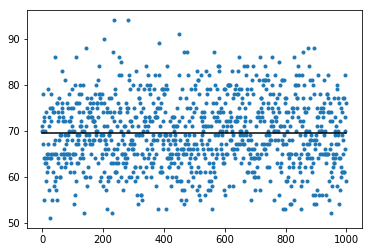

In [120]:
times= 1000
A = np.array([main(10).play() for i in range(times)])
print(sum(A[:,0])/times,sum(A[:,1])/times,sum(A[:,2])/times,sum(A[:,3])/times)
plt.plot(A[:,3],'.')
plt.plot([0,times],[sum(A[:,3])/times,sum(A[:,3])/times],'k')
plt.show()

## With no repetition

In [97]:
class main:
    """The main class takecare about the view of the game, the round step and 
       
       the interaction between the players
    """
    def __init__(self, bs):
        self.p1 = player('David' ,bs)
        self.p2 = player('Joe'   ,bs)
        self.bs = bs
    
    def round_n(self , ships_enemy , board_shot ):
        """The round look at if you shotted a ship or the sea and gives 
           
           the belge color for wrong shot and red for the right 
        """
        count = 0
        x,y = AI(self.bs , board_shot).xy_no_repetition() 
        if ships_enemy[x,y] ==  0:
            ships_enemy[x,y] , board_shot[x,y] = -1 , -1
        elif ships_enemy[x,y] > 0 :
            ships_enemy[x,y] , board_shot[x,y] = -10, -10
            count = 1
        return ships_enemy , board_shot , count
    
    def play(self):
        """Here we have the interaction between the 2 instance created in te __init__"""
        times, count1, count2 = 0 , 0 , 0

        while count1 < 17 and count2 < 17:
            
            A=self.round_n( self.p2.board_ship(), self.p1.board_shot())
            #self.p1.plot( self.p1.board_ship() , self.p1.board_shot(), self.p1.player,self.p2.player,0,1 )

            B=self.round_n(self.p1.board_ship(), self.p2.board_shot())
            #self.p1.plot( self.p2.board_ship() , self.p2.board_shot(), self.p1.player,self.p2.player,1,0 )
            
            count1 += A[2]
            count2 += B[2]
            times  += 1
        if count1 > count2:
            win =[1,0, 0, times]#self.p1.player+' won the game'
        elif count2 > count1: 
            win =[0,1, 0, times]# self.p2.player+' won the game'
        else: win = [0,0, 1, times]
        
        return win

0.461 0.451 0.088 92.936


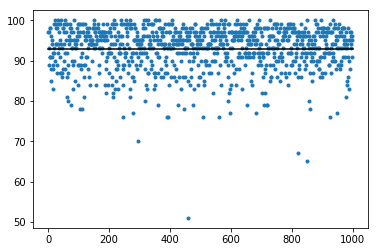

In [98]:
times= 1000
B = np.array([main(10).play() for i in range(times)])
print(sum(B[:,0])/times,sum(B[:,1])/times,sum(B[:,2])/times,sum(B[:,3])/times)
plt.plot(B[:,3],'.')
plt.plot([0,times],[sum(B[:,3])/times,sum(B[:,3])/times],'k')
plt.show()

## With repetition

In [100]:
class main:
    """The main class takecare about the view of the game, the round step and 
       
       the interaction between the players
    """
    def __init__(self, bs):
        self.p1 = player('David' ,bs)
        self.p2 = player('Joe'   ,bs)
        self.bs = bs
    
    def round_n(self , ships_enemy , board_shot ):
        """The round look at if you shotted a ship or the sea and gives 
           
           the belge color for wrong shot and red for the right 
        """
        count = 0
        x,y = AI(self.bs , board_shot).xy() 
        if ships_enemy[x,y] ==  0:
            ships_enemy[x,y] , board_shot[x,y] = -1 , -1
        elif ships_enemy[x,y] > 0 :
            ships_enemy[x,y] , board_shot[x,y] = -10, -10
            count = 1
        return ships_enemy , board_shot , count
    
    def play(self):
        """Here we have the interaction between the 2 instance created in te __init__"""
        times, count1, count2 = 0 , 0 , 0

        while count1 < 17 and count2 < 17:
            
            A=self.round_n( self.p2.board_ship(), self.p1.board_shot())
            #self.p1.plot( self.p1.board_ship() , self.p1.board_shot(), self.p1.player,self.p2.player,0,1 )

            B=self.round_n(self.p1.board_ship(), self.p2.board_shot())
            #self.p1.plot( self.p2.board_ship() , self.p2.board_shot(), self.p1.player,self.p2.player,1,0 )
            
            count1 += A[2]
            count2 += B[2]
            times  += 1
        if count1 > count2:
            win =[1,0, 0, times]#self.p1.player+' won the game'
        elif count2 > count1: 
            win =[0,1, 0, times]# self.p2.player+' won the game'
        else: win = [0,0, 1, times]
        
        return win


0.516 0.483 0.001 274.351


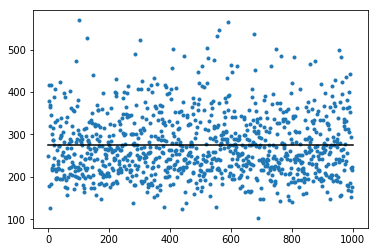

In [101]:
times= 1000
C = np.array([main(10).play() for i in range(times)])
print(sum(C[:,0])/times,sum(C[:,1])/times,sum(C[:,2])/times,sum(C[:,3])/times)
plt.plot(C[:,3],'.')
plt.plot([0,times],[sum(C[:,3])/times,sum(C[:,3])/times],'k')
plt.show()

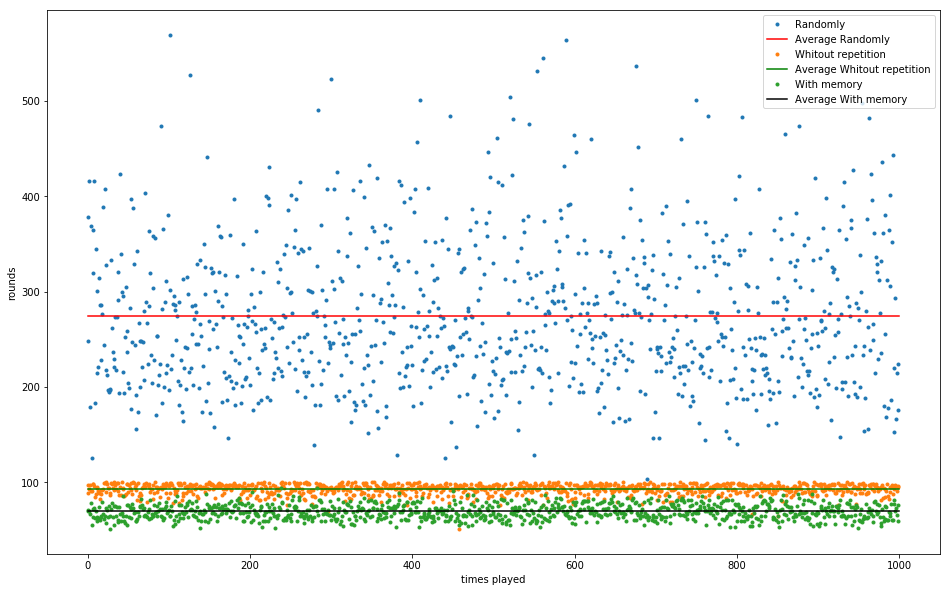

In [121]:
plt.figure(figsize=(16,10))
plt.plot(C[:,3],'.',label='Randomly')
plt.plot([0,times],[sum(C[:,3])/times,sum(C[:,3])/times],'red',label='Average Randomly')
plt.plot(B[:,3],'.',label='Whitout repetition')
plt.plot([0,times],[sum(B[:,3])/times,sum(B[:,3])/times],'green',label='Average Whitout repetition' )
plt.plot(A[:,3],'.',label='With memory')
plt.plot([0,times],[sum(A[:,3])/times,sum(A[:,3])/times],'k',label='Average With memory')
plt.xlabel('times played')
plt.ylabel('rounds')
plt.legend()
plt.savefig('3types')
plt.show()

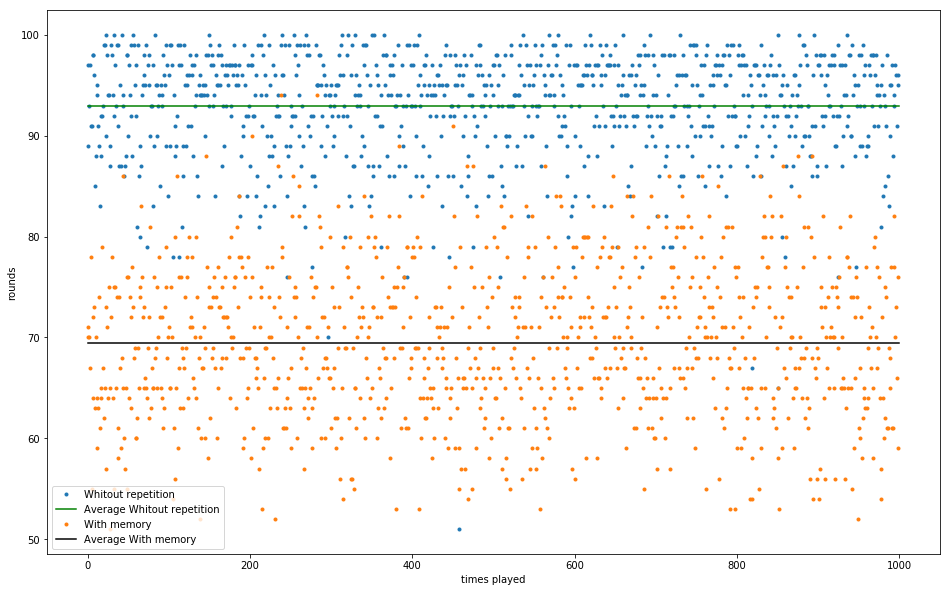

In [122]:
plt.figure(figsize=(16,10))
plt.plot(B[:,3],'.',label='Whitout repetition')
plt.plot([0,times],[sum(B[:,3])/times,sum(B[:,3])/times],'green',label='Average Whitout repetition' )
plt.plot(A[:,3],'.',label='With memory')
plt.plot([0,times],[sum(A[:,3])/times,sum(A[:,3])/times],'k',label='Average With memory')
plt.xlabel('times played')
plt.ylabel('rounds')
plt.legend()
plt.savefig('2types')
plt.show()